# Colab

In [ ]:
#!unzip /content/Signdataset.zip -d /content/Signdataset


In [ ]:
#IMPORT lib(s)
import matplotlib.pyplot as plt
import random
import os
import matplotlib.image as mpimg
import cv2
import numpy as np
import math
from keras.optimizers import Adam

In [ ]:
#IMPORTANT
#function take img array, height , width
#to convert image of aspect ratio of 1:1.... height=80 and weight=80
def resize_img(img,imgh,imgw):
    imgsize=80
    #WHITE BACKGROUND
    imgwhite=np.ones((imgsize,imgsize,3),np.uint8)*255

    #if hight>width
    #adjusting the width
    if imgh>imgw:
        k=imgsize/imgh
        wcal=math.floor(k*imgw)
        #reshaping the hight to imgsize and width to calculated width
        imgresize=cv2.resize(img,(wcal,imgsize))
        #wgap is to bring the image in middle
        wgap=math.floor((imgsize-wcal)/2)
        #putting image over white background
        imgwhite[:,wgap:wcal+wgap]=imgresize


    #if hight<width
    #adjysting the hight
    else:
        k=imgsize/imgw
        hcal=math.floor(k*imgh)
        imgresize=cv2.resize(img,(imgsize,hcal))
        hgap=math.floor((imgsize-hcal)/2)
        imgwhite[hgap:hcal+hgap,:]=imgresize
    return imgwhite

In [ ]:
def load_img(a,b):
    x=[]
    for i in range(1201,3001):     
        img=cv2.imread(r"/content/Signdataset/Signdataset/train/"+str(a)+"/"+str(b)+"_"+str(i)+".jpg")

        try:
            if img!=None:
                imgw=img.shape[1]
                imgh=img.shape[0]
                #calling the function resize_img
                img=resize_img(img,imgh,imgw)
                x.append(img)
        except:
            imgw=img.shape[1]
            imgh=img.shape[0]
            img=resize_img(img,imgh,imgw)
            x.append(img)
    return x
#file names
numbers=['zero','one','two','three','four','five','six','seven','eight','nine','sum','sub','mul','div','equ','back']
#train dataset
train=[]
#for 0 to 15
for i in range(16):
    x=load_img(i,numbers[i])   #foldername, filename
    train.extend(x)

In [ ]:
len(train)

28800

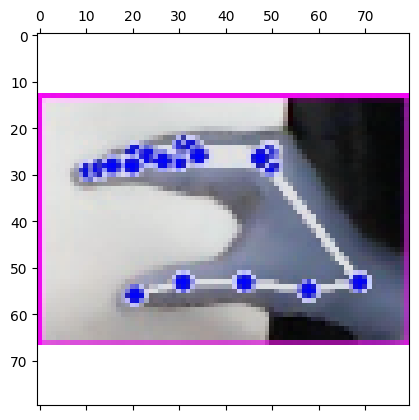

In [ ]:
plt.matshow(train[19200])

In [ ]:
#converting list to array
train=np.array(train)

In [ ]:
#normalization
train=train/255

In [ ]:
#creating y_train dataset
y_train=[]
for i in range(0,16):
  y_train+=[[i] for _ in range(1800)]

#IMPORTANT to convert it into int_
y_train=np.array(y_train).astype(np.int_)

In [ ]:
len(y_train)

28800

In [ ]:
x=None

# CNN

In [ ]:
#IMPORT lib(s)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

In [ ]:
inputs=layers.Input(shape=(80, 80, 3))

c=(layers.Conv2D(128,(3,3),padding='valid',activation='relu'))(inputs)
m=(layers.MaxPooling2D((2,2),(2,2)))(c)

c1=(layers.Conv2D(64,(3,3),padding='valid',activation='relu'))(m)
m1=(layers.MaxPooling2D((2,2),(2,2)))(c1)
c2=(layers.Conv2D(32,(3,3),padding='valid',activation='relu'))(m1)

m2=(layers.MaxPooling2D((2,2),(2,2)))(c2)


f=layers.Flatten()(m2)

d=layers.Dense(32,activation='relu')(f)
d1=layers.Dense(24,activation='sigmoid')(d)
out=layers.Dense(16,activation='softmax')(d1)

In [ ]:
#MODEL BINDING
model=models.Model(inputs,out)

In [ ]:
adam=Adam(lr=2e-4,beta_1=0.5)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
#compliling
#we use sparse_categorical_ce  in case when y_train is not one hot encoded
model.compile(optimizer=adam,loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 78, 78, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464 

In [ ]:
!pip install visualkeras

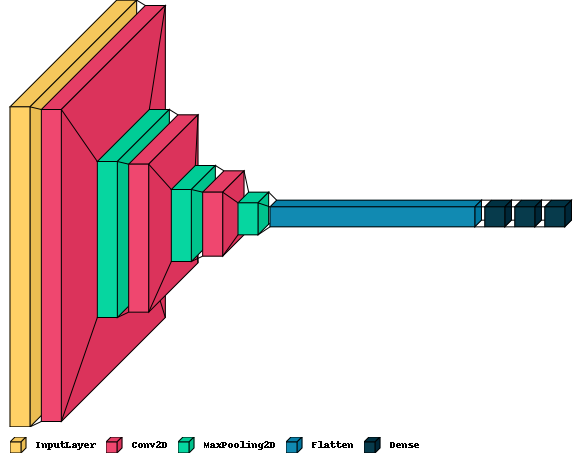

In [ ]:
#To visualize the stucture of the model
import visualkeras
visualkeras.layered_view(model, legend=True)

In [ ]:
#training
model.fit(train,y_train,epochs=20)

Epoch 1/20
900/900 [==============================] - 24s 14ms/step - loss: 1.5854 - accuracy: 0.7566
Epoch 2/20
900/900 [==============================] - 13s 14ms/step - loss: 0.7060 - accuracy: 0.9861
Epoch 3/20
900/900 [==============================] - 13s 14ms/step - loss: 0.3516 - accuracy: 0.9971
Epoch 4/20
900/900 [==============================] - 13s 14ms/step - loss: 0.1889 - accuracy: 0.9991
Epoch 5/20
900/900 [==============================] - 13s 14ms/step - loss: 0.1110 - accuracy: 0.9998
Epoch 6/20
900/900 [==============================] - 13s 14ms/step - loss: 0.0697 - accuracy: 0.9998
Epoch 7/20
900/900 [==============================] - 13s 14ms/step - loss: 0.0456 - accuracy: 0.9997
Epoch 8/20
900/900 [==============================] - 12s 14ms/step - loss: 0.0264 - accuracy: 0.9999
Epoch 9/20
900/900 [==============================] - 12s 14ms/step - loss: 0.0219 - accuracy: 0.9987
Epoch 10/20
900/900 [==============================] - 12s 14ms/step - loss: 0.012

In [ ]:
#evaluation over training set
#model.evaluate(train,y_train)

In [ ]:
#save the model
model.save('calculator7.h5')